## Classification (d)

In [6]:
# from neuralnet_update_PC import *
# from neuralnet_works_FC import *
from neuralnet import *
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt

config_d = {}
config_d['layer_specs'] = [3072, 64, 64, 10]
config_d['activation'] = 'tanh'
config_d['learning_rate'] = 0.01
config_d['batch_size'] = 256
config_d['epochs'] = 165# 150 + 15   # need to 10% more from configc
config_d['early_stop'] = True 
config_d['early_stop_epoch'] = 5
#config_d['L2_penalty'] = 0  
config_d['momentum'] = True  
config_d['momentum_gamma'] = 0.9
# Create the model

#TODO
#momentum, early stop , expect accuracy around 37%


L2 = [1e-2, 1e-3, 1e-4]


# Load the data
x_train, y_train, stats = load_data(path="./data",stats = None, mode="train")
x_test, y_test = load_data(path="./data",stats = stats, mode="test")

x_train, y_train, x_valid, y_valid = split_data(x_train,y_train)
# model add

epoch_all = []
train_loss_record_all = []
holdout_loss_record_all = []
train_accuracy_record_all = []
holdout_accuracy_record_all = []
test_accuracy_all = []
epoch_record = []

    
for var in L2:
    config_d['L2_penalty'] = var
    model_d  = Neuralnetwork(config_d)
    epoch, train_loss_record, train_accuracy_record, holdout_loss_record, holdout_accuracy_record = train(model_d,x_train,y_train,x_valid,y_valid,config_d)
    
    epoch_all.append(epoch)
    train_loss_record_all.append(train_loss_record)
    holdout_loss_record_all.append(holdout_loss_record)
    train_accuracy_record_all.append(train_accuracy_record)
    holdout_accuracy_record_all.append(holdout_accuracy_record)    
    model_d.save_load_weight(save=False) # load data
    test_accuracy = test(model_d, x_test, y_test) 
    test_accuracy_all.append(test_accuracy)                          
    epoch_record.append(epoch)
    


(50000, 32, 32, 3)
Epoch: 1, train accuracy: 0.2453, train_loss_norm:0.2952, valid_acc: 0.2548, valid_loss_norm: 0.2198
Valid loss going down!
Epoch: 2, train accuracy: 0.2875, train_loss_norm:0.2143, valid_acc: 0.2630, valid_loss_norm: 0.2109
Valid loss going down!
Epoch: 3, train accuracy: 0.3059, train_loss_norm:0.2069, valid_acc: 0.2732, valid_loss_norm: 0.2090
Valid loss going down!
Epoch: 4, train accuracy: 0.3193, train_loss_norm:0.2031, valid_acc: 0.2890, valid_loss_norm: 0.2037
Valid loss going down!
Epoch: 5, train accuracy: 0.3421, train_loss_norm:0.1957, valid_acc: 0.3120, valid_loss_norm: 0.1927
Valid loss going down!
Epoch: 6, train accuracy: 0.3548, train_loss_norm:0.1906, valid_acc: 0.3132, valid_loss_norm: 0.1915
Valid loss going down!
Epoch: 7, train accuracy: 0.3685, train_loss_norm:0.1865, valid_acc: 0.3404, valid_loss_norm: 0.1878
Valid loss going down!
Epoch: 8, train accuracy: 0.3855, train_loss_norm:0.1824, valid_acc: 0.3348, valid_loss_norm: 0.1912
Valid loss g

Epoch: 63, train accuracy: 0.4343, train_loss_norm:0.1685, valid_acc: 0.3912, valid_loss_norm: 0.1729
Valid loss go up!
Current patience count: 1
Epoch: 64, train accuracy: 0.4346, train_loss_norm:0.1687, valid_acc: 0.3966, valid_loss_norm: 0.1712
Valid loss going down!
Epoch: 65, train accuracy: 0.4370, train_loss_norm:0.1673, valid_acc: 0.3874, valid_loss_norm: 0.1734
Valid loss go up!
Current patience count: 1
Epoch: 66, train accuracy: 0.4388, train_loss_norm:0.1680, valid_acc: 0.3946, valid_loss_norm: 0.1728
Valid loss going down!
Epoch: 67, train accuracy: 0.4383, train_loss_norm:0.1676, valid_acc: 0.3926, valid_loss_norm: 0.1704
Valid loss going down!
Epoch: 68, train accuracy: 0.4369, train_loss_norm:0.1686, valid_acc: 0.3732, valid_loss_norm: 0.1772
Valid loss go up!
Current patience count: 1
Epoch: 69, train accuracy: 0.4361, train_loss_norm:0.1686, valid_acc: 0.3810, valid_loss_norm: 0.1750
Valid loss going down!
Epoch: 70, train accuracy: 0.4351, train_loss_norm:0.1679, val

Epoch: 124, train accuracy: 0.4394, train_loss_norm:0.1679, valid_acc: 0.3746, valid_loss_norm: 0.1742
Valid loss go up!
Current patience count: 1
Epoch: 125, train accuracy: 0.4359, train_loss_norm:0.1687, valid_acc: 0.4024, valid_loss_norm: 0.1692
Valid loss going down!
Epoch: 126, train accuracy: 0.4353, train_loss_norm:0.1688, valid_acc: 0.3766, valid_loss_norm: 0.1765
Valid loss go up!
Current patience count: 1
Epoch: 127, train accuracy: 0.4330, train_loss_norm:0.1690, valid_acc: 0.3790, valid_loss_norm: 0.1732
Valid loss going down!
Epoch: 128, train accuracy: 0.4330, train_loss_norm:0.1688, valid_acc: 0.3944, valid_loss_norm: 0.1715
Valid loss going down!
Epoch: 129, train accuracy: 0.4389, train_loss_norm:0.1679, valid_acc: 0.3752, valid_loss_norm: 0.1783
Valid loss go up!
Current patience count: 1
Epoch: 130, train accuracy: 0.4376, train_loss_norm:0.1678, valid_acc: 0.3710, valid_loss_norm: 0.1769
Valid loss going down!
Epoch: 131, train accuracy: 0.4370, train_loss_norm:0.1

Epoch: 21, train accuracy: 0.3745, train_loss_norm:0.1850, valid_acc: 0.3436, valid_loss_norm: 0.1897
Valid loss going down!
Epoch: 22, train accuracy: 0.3783, train_loss_norm:0.1833, valid_acc: 0.3362, valid_loss_norm: 0.1927
Valid loss go up!
Current patience count: 1
Epoch: 23, train accuracy: 0.3831, train_loss_norm:0.1826, valid_acc: 0.3332, valid_loss_norm: 0.1871
Valid loss going down!
Epoch: 24, train accuracy: 0.3842, train_loss_norm:0.1822, valid_acc: 0.3248, valid_loss_norm: 0.1890
Valid loss go up!
Current patience count: 1
Epoch: 25, train accuracy: 0.3876, train_loss_norm:0.1809, valid_acc: 0.3384, valid_loss_norm: 0.1865
Valid loss going down!
Epoch: 26, train accuracy: 0.3866, train_loss_norm:0.1808, valid_acc: 0.3492, valid_loss_norm: 0.1872
Valid loss go up!
Current patience count: 1
Epoch: 27, train accuracy: 0.3860, train_loss_norm:0.1810, valid_acc: 0.3442, valid_loss_norm: 0.1885
Valid loss go up!
Current patience count: 2
Epoch: 28, train accuracy: 0.3868, train_

Epoch: 82, train accuracy: 0.4581, train_loss_norm:0.1605, valid_acc: 0.3978, valid_loss_norm: 0.1738
Valid loss go up!
Current patience count: 2
Epoch: 83, train accuracy: 0.4634, train_loss_norm:0.1599, valid_acc: 0.3916, valid_loss_norm: 0.1732
Valid loss going down!
Epoch: 84, train accuracy: 0.4660, train_loss_norm:0.1593, valid_acc: 0.4110, valid_loss_norm: 0.1672
Valid loss going down!
Epoch: 85, train accuracy: 0.4672, train_loss_norm:0.1588, valid_acc: 0.4122, valid_loss_norm: 0.1676
Valid loss go up!
Current patience count: 1
Epoch: 86, train accuracy: 0.4594, train_loss_norm:0.1607, valid_acc: 0.4048, valid_loss_norm: 0.1730
Valid loss go up!
Current patience count: 2
Epoch: 87, train accuracy: 0.4627, train_loss_norm:0.1604, valid_acc: 0.3766, valid_loss_norm: 0.1771
Valid loss go up!
Current patience count: 3
Epoch: 88, train accuracy: 0.4562, train_loss_norm:0.1624, valid_acc: 0.4110, valid_loss_norm: 0.1722
Valid loss going down!
Epoch: 89, train accuracy: 0.4617, train_

Epoch: 142, train accuracy: 0.4719, train_loss_norm:0.1577, valid_acc: 0.4182, valid_loss_norm: 0.1664
Valid loss going down!
Epoch: 143, train accuracy: 0.4762, train_loss_norm:0.1567, valid_acc: 0.4002, valid_loss_norm: 0.1738
Valid loss go up!
Current patience count: 1
Epoch: 144, train accuracy: 0.4726, train_loss_norm:0.1573, valid_acc: 0.4074, valid_loss_norm: 0.1679
Valid loss going down!
Epoch: 145, train accuracy: 0.4710, train_loss_norm:0.1572, valid_acc: 0.3960, valid_loss_norm: 0.1727
Valid loss go up!
Current patience count: 1
Epoch: 146, train accuracy: 0.4725, train_loss_norm:0.1571, valid_acc: 0.4142, valid_loss_norm: 0.1682
Valid loss going down!
Epoch: 147, train accuracy: 0.4751, train_loss_norm:0.1571, valid_acc: 0.4154, valid_loss_norm: 0.1696
Valid loss go up!
Current patience count: 1
Epoch: 148, train accuracy: 0.4713, train_loss_norm:0.1579, valid_acc: 0.4252, valid_loss_norm: 0.1676
Valid loss going down!
Epoch: 149, train accuracy: 0.4742, train_loss_norm:0.1

Epoch: 38, train accuracy: 0.3815, train_loss_norm:0.1818, valid_acc: 0.3512, valid_loss_norm: 0.1891
Valid loss going down!
Epoch: 39, train accuracy: 0.3834, train_loss_norm:0.1815, valid_acc: 0.3284, valid_loss_norm: 0.1883
Valid loss going down!
Epoch: 40, train accuracy: 0.3829, train_loss_norm:0.1812, valid_acc: 0.3456, valid_loss_norm: 0.1921
Valid loss go up!
Current patience count: 1
Epoch: 41, train accuracy: 0.3815, train_loss_norm:0.1819, valid_acc: 0.3306, valid_loss_norm: 0.1893
Valid loss going down!
Epoch: 42, train accuracy: 0.3857, train_loss_norm:0.1809, valid_acc: 0.3392, valid_loss_norm: 0.1903
Valid loss go up!
Current patience count: 1
Epoch: 43, train accuracy: 0.3917, train_loss_norm:0.1789, valid_acc: 0.3526, valid_loss_norm: 0.1866
Valid loss going down!
Epoch: 44, train accuracy: 0.3864, train_loss_norm:0.1808, valid_acc: 0.3420, valid_loss_norm: 0.1890
Valid loss go up!
Current patience count: 1
Epoch: 45, train accuracy: 0.3897, train_loss_norm:0.1804, val

Epoch: 99, train accuracy: 0.4381, train_loss_norm:0.1658, valid_acc: 0.3770, valid_loss_norm: 0.1810
Valid loss go up!
Current patience count: 1
Epoch: 100, train accuracy: 0.4336, train_loss_norm:0.1670, valid_acc: 0.3774, valid_loss_norm: 0.1805
Valid loss going down!
Epoch: 101, train accuracy: 0.4326, train_loss_norm:0.1671, valid_acc: 0.3738, valid_loss_norm: 0.1806
Valid loss go up!
Current patience count: 1
Epoch: 102, train accuracy: 0.4373, train_loss_norm:0.1657, valid_acc: 0.3730, valid_loss_norm: 0.1816
Valid loss go up!
Current patience count: 2
Epoch: 103, train accuracy: 0.4366, train_loss_norm:0.1665, valid_acc: 0.3690, valid_loss_norm: 0.1848
Valid loss go up!
Current patience count: 3
Epoch: 104, train accuracy: 0.4379, train_loss_norm:0.1661, valid_acc: 0.3592, valid_loss_norm: 0.1836
Valid loss going down!
Epoch: 105, train accuracy: 0.4422, train_loss_norm:0.1655, valid_acc: 0.3742, valid_loss_norm: 0.1811
Valid loss going down!
Epoch: 106, train accuracy: 0.4378,

Epoch: 160, train accuracy: 0.4616, train_loss_norm:0.1595, valid_acc: 0.3912, valid_loss_norm: 0.1777
Valid loss going down!
Epoch: 161, train accuracy: 0.4661, train_loss_norm:0.1573, valid_acc: 0.3990, valid_loss_norm: 0.1757
Valid loss going down!
Epoch: 162, train accuracy: 0.4700, train_loss_norm:0.1574, valid_acc: 0.3746, valid_loss_norm: 0.1834
Valid loss go up!
Current patience count: 1
Epoch: 163, train accuracy: 0.4638, train_loss_norm:0.1589, valid_acc: 0.3938, valid_loss_norm: 0.1797
Valid loss going down!
Epoch: 164, train accuracy: 0.4628, train_loss_norm:0.1590, valid_acc: 0.3702, valid_loss_norm: 0.1858
Valid loss go up!
Current patience count: 1
Epoch: 165, train accuracy: 0.4658, train_loss_norm:0.1585, valid_acc: 0.4006, valid_loss_norm: 0.1772
Valid loss going down!


[0.3874, 0.3946, 0.406]


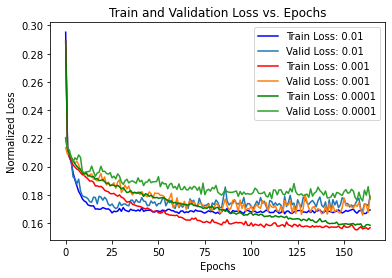

In [8]:
print(test_accuracy_all)
import matplotlib.pyplot as plt
num_epochs = [i for i in range(config_d['epochs'])]
# Line type
train_loss_lt = ['-b', '-r', '-g']
valid_loss_lt = ['--b', '--r', '--g']

for i, var in enumerate(L2):
    plt.plot(np.arange(epoch+1), train_loss_record_all[i], train_loss_lt[i], label=f"Train Loss: {var}")
    plt.plot(np.arange(epoch+1), holdout_loss_record_all[i], label=f"Valid Loss: {var}")
plt.xlabel('Epochs')
plt.ylabel('Normalized Loss')
plt.title("Train and Validation Loss vs. Epochs")
plt.legend()
plt.show()

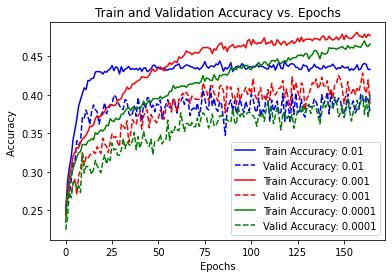

In [9]:
import matplotlib.pyplot as plt
num_epochs = [i for i in range(config_d['epochs'])]
# Line type
train_loss_lt = ['-b', '-r', '-g']
valid_loss_lt = ['--b', '--r', '--g']

for i, var in enumerate(L2):
    plt.plot(np.arange(epoch+1), train_accuracy_record_all[i], train_loss_lt[i], label=f"Train Accuracy: {var}")
    plt.plot(np.arange(epoch+1), holdout_accuracy_record_all[i], valid_loss_lt[i], label=f"Valid Accuracy: {var}")
plt.xlabel('Epochs')
plt.ylabel('Accuracy ')
plt.title("Train and Validation Accuracy vs. Epochs")
plt.legend()
plt.show()

In [ ]:
print('test set result : ' ,test_accuracy_all)

plt.figure(1)
plt.plot(np.arange(epoch_all[0]+1), train_loss_record_all[0], label='train')
plt.plot(np.arange(epoch_all[0]+1), holdout_loss_record_all[0], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss vs epochs')
plt.legend()
plt.show()

plt.figure(2)
plt.plot(np.arange(epoch_all[0]+1), train_accuracy_record_all[0], label='train')
plt.plot(np.arange(epoch_all[0]+1), holdout_accuracy_record_all[0], label='valid')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy vs epochs')
plt.legend()
plt.show()

plt.figure(3)
plt.plot(np.arange(epoch_all[1]+1), train_loss_record_all[1], label='train')
plt.plot(np.arange(epoch_all[1]+1), holdout_loss_record_all[1], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss vs epochs')
plt.legend()
plt.show()

plt.figure(4)
plt.plot(np.arange(epoch_all[1]+1), train_accuracy_record_all[1], label='train')
plt.plot(np.arange(epoch_all[1]+1), holdout_accuracy_record_all[1], label='valid')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy vs epochs')
plt.legend()
plt.show()

plt.figure(5)
plt.plot(np.arange(epoch_all[2]+1), train_loss_record_all[2], label='train')
plt.plot(np.arange(epoch_all[2]+1), holdout_loss_record_all[2], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation loss vs epochs')
plt.legend()
plt.show()

plt.figure(6)
plt.plot(np.arange(epoch_all[2]+1), train_accuracy_record_all[2], label='train')
plt.plot(np.arange(epoch_all[2]+1), holdout_accuracy_record_all[2], label='valid')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy vs epochs')
plt.legend()
plt.show()